#**Introduction to Tensors**

###**Topics covered**


1.   Introduction to tensors
2.   Getting information from tensors
3. Manipulating tensors
4. Tensors & Numpy
5. Using @tf.function ( a way to speed up your regular python functions)
6. Using GPU's with Tensorflow(or TPU)






In [ ]:
#Import tensorflow
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.11.0


In [ ]:
#Creating tensors with tf.constant()
scalar=tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [ ]:
# Check the number of diemension of a tensor (ndim stands for nnumber of diemensions)
scalar.ndim

0

In [ ]:
#Create a vector
vector=tf.constant([10,10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [ ]:
#Check the diemension of our vector
vector.ndim

1

In [ ]:
#Create a matrix ( has more than 1 diemension)
matrix = tf.constant([[10,7],[7,10]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]], dtype=int32)>

In [ ]:
matrix.ndim

2

In [ ]:
#Create another matrix
another_matrix=tf.constant([[10.,7.],
                            [3.,2.],
                            [8.,9.]],dtype=tf.float16) #specify the data type with dtype parameter
another_matrix

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  7.],
       [ 3.,  2.],
       [ 8.,  9.]], dtype=float16)>

In [ ]:
another_matrix.ndim

2

In [ ]:
#Let's create a tensor
tensor=tf.constant([[[1,2,3,],
                     [4,5,6]],
                    [[7,8,9],
                     [10,11,12]],
                    [[13,14,15],
                     [16,17,18]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]], dtype=int32)>

In [ ]:
#Diemension of tensor
tensor.ndim

3

1. Scalar: a single number
2. Vector: a number with direction (e.g. wind speed and direction)
3. Matrix: a 2-diemensional array of numbers
4. Tensor: an n-diemensional array of numbers ( when n can be any diemenstion, 0-diemensional  is a scalar, 1-diemensional tensor is a vector, a 2-diemensional tensor is a matrix)

**Creating tensors with `tf.Variable`**

In [ ]:
#Create the same tensor with tf.variable() as above
changable_tensor=tf.Variable([10,7])
unchangable_tensor=tf.constant([10,7])
changable_tensor, unchangable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>)

In [ ]:
#Let's try change one of the element in our changeable tensor
changable_tensor[0]=7
changable_tensor

TypeError: ignored

In [ ]:
#Try with .assign()
changable_tensor[0].assign(7)
changable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([7, 7], dtype=int32)>

In [ ]:
#Let's try change our unchangeable tensor
unchangable_tensor[0].assign(20)
unchangable_tensor

AttributeError: ignored

**Creating Random tensor**

Random tensors are tensors of some arbitrary size which contain random numbers

In [ ]:
#Create two random (but the same tensors)
random_1=tf.random.Generator.from_seed(42) # set seed for reproducibility
random_1=random_1.normal(shape=(3,2))
random_2=tf.random.Generator.from_seed(42)
random_2=random_2.normal(shape=(3,2))
random_1,random_2, random_1 ==random_2

(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=bool, numpy=
 array([[ True,  True],
        [ True,  True],
        [ True,  True]])>)

**Shuffle the order of elements in a tensor**

In [ ]:
#Shuffle a tensor ( valuable for when you want to shuffle your data so iherent order does'nt affect learning)
not_shuffled=tf.constant([[10,7],
                          [3,4],
                          [2,5]])
not_shuffled.ndim

2

In [ ]:
not_shuffled

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]], dtype=int32)>

In [ ]:
#Shuffle our non shuffled tensor
shuffled=tf.random.shuffle(not_shuffled)
shuffled

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 2,  5],
       [ 3,  4],
       [10,  7]], dtype=int32)>

**Exercise:** Read through TensorFlow documentation on random seed generation: https://www.tensorflow.org/api_docs/python/tf/random/set_seed  and practices write 5 random tensors and shuffle them

If we wan to our shuffled tensors to be in the same order, we've got to use the global level random seed as well as the operation level random seed

In [ ]:
tf.random.set_seed(42) #global level random seed
tf.random.shuffle(not_shuffled,seed=42) # operation leve; random seed

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]], dtype=int32)>

##**Other ways to make tensors**

In [ ]:
#Create a tensor of all ones
tf.ones([10,7])

<tf.Tensor: shape=(10, 7), dtype=float32, numpy=
array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]], dtype=float32)>

In [ ]:
#Create a tensor of all 0's
tf.zeros(shape=(3,4))

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

##**You can also turn NumPy arrays into tensors**
The  main difference between NumPy arrays and TensorFlow tensors is that tensors can be run on a GPU ( much faster for numerical computing)

In [ ]:
import numpy as np
numpy_A= np.arange(1,25, dtype=np.int32)#create a Numpy array between 1 and 25
numpy_A

# X=tf.constant(some_matrix) # capital for matrix for matrix or tensor
# y=tf.constant(vector) #non capital for vector

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)

In [ ]:
A=tf.constant(numpy_A, shape=(2,3,4))
A

<tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]],

       [[13, 14, 15, 16],
        [17, 18, 19, 20],
        [21, 22, 23, 24]]], dtype=int32)>

##Getting information from tensors

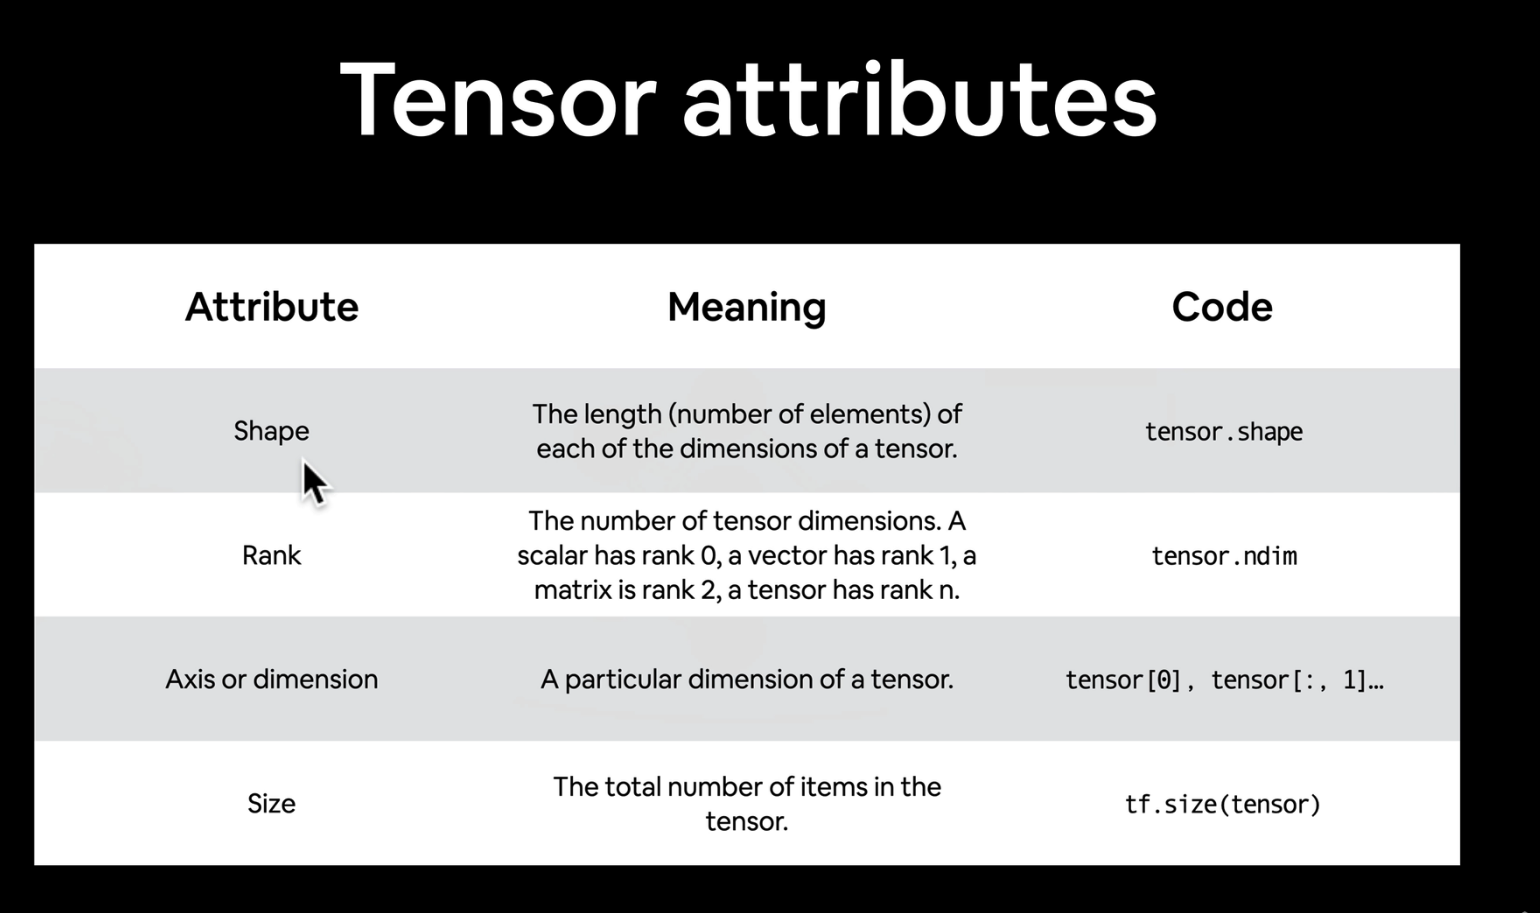

In [ ]:
#Create a rank 4 tensor (4 diemensions)
rank_4_tensor=tf.zeros(shape=[2,3,4,5])
rank_4_tensor

<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

In [ ]:
rank_4_tensor[0]

<tf.Tensor: shape=(3, 4, 5), dtype=float32, numpy=
array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]], dtype=float32)>

In [ ]:
rank_4_tensor.shape, rank_4_tensor.ndim,tf.size(rank_4_tensor)

(TensorShape([2, 3, 4, 5]), 4, <tf.Tensor: shape=(), dtype=int32, numpy=120>)

In [ ]:
2*3*4*5

120

In [ ]:
#Get various attributes of our tensors
print("Datatype of every element: ",rank_4_tensor.dtype)
print("Number of dimensions( rank):", rank_4_tensor.ndim)
print("Shape of the tensor: ", rank_4_tensor.shape)
print("Elements along the 0 axis: ",rank_4_tensor.shape[0])
print("Elements along the last axis: ", rank_4_tensor.shape[-1])
print("Total number of elements in our tensor: ",tf.size(rank_4_tensor).numpy())

Datatype of every element:  <dtype: 'float32'>
Number of dimensions( rank): 4
Shape of the tensor:  (2, 3, 4, 5)
Elements along the 0 axis:  2
Elements along the last axis:  5
Total number of elements in our tensor:  120


## **Indexing Tensors**

Tensors can be indexed just like Python lists

In [ ]:
# Get the first 2 elements of each diemension
rank_4_tensor[:2,:2,:2,:2]

<tf.Tensor: shape=(2, 2, 2, 2), dtype=float32, numpy=
array([[[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]]], dtype=float32)>

In [ ]:
rank_4_tensor.shape

TensorShape([2, 3, 4, 5])

In [ ]:
# get the first element from each dimension  from each index except for the final one
rank_4_tensor[:1,:1,:,:1]

<tf.Tensor: shape=(1, 1, 4, 1), dtype=float32, numpy=
array([[[[0.],
         [0.],
         [0.],
         [0.]]]], dtype=float32)>

In [ ]:
#Adding an extra  dimension in a tensor
# Create a rank 2 tensor(2 dimensions)
rank_2_tensor = tf.constant([[10,7],
                                                                  [3,4]])
rank_2_tensor.shape, rank_2_tensor.ndim

(TensorShape([2, 2]), 2)

In [ ]:
rank_2_tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]], dtype=int32)>

In [ ]:
# Get the last item of each of our rank 2 tensor
rank_2_tensor[:,-1]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([7, 4], dtype=int32)>

In [ ]:
#Add in extra dimension to our rank 2 tensor
# [..., tf.newaxis] means everyaxis before the last one
rank_3_tensor = rank_2_tensor[...,tf.newaxis]
rank_3_tensor

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 3],
        [ 4]]], dtype=int32)>

In [ ]:
#Alternative to tf.newaxis
tf.expand_dims(rank_2_tensor,axis=-1) #"-1" means expand the final axis

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 3],
        [ 4]]], dtype=int32)>

In [ ]:
#Expand 0 axis
tf.expand_dims(rank_2_tensor,axis=0)

<tf.Tensor: shape=(1, 2, 2), dtype=int32, numpy=
array([[[10,  7],
        [ 3,  4]]], dtype=int32)>

##**Manipulating tensors (tensor operations)**


**Basic Operations**
`+`,`-`,`*`,`/`

In [ ]:
#You can add valurs to a tensor using the addition operator
tensor=tf.constant([[10,7],
                                                  [3,4]])
tensor + 10


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [13, 14]], dtype=int32)>

In [ ]:
#original tensor is unchanged
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]], dtype=int32)>

In [ ]:
#Multitplication also works
tensor *10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]], dtype=int32)>

In [ ]:
#Subtraction if you want
tensor - 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 0, -3],
       [-7, -6]], dtype=int32)>

In [ ]:
#We can use the tensorflow built in functions too
tf.multiply(tensor,10)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]], dtype=int32)>

In [ ]:
tf.add(tensor,10)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [13, 14]], dtype=int32)>

In [ ]:
tf.subtract(tensor,10)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 0, -3],
       [-7, -6]], dtype=int32)>

##**Matrix Multiplication**

In Machine Learning, matrix multiplication is one of the most common tensor operations.


There are two rules our tensors (or matrices) need to fulfil if we're going to matrix multiply them:

1. The Inner dimension must match
2. The resulting matrix has the shape of the outer dimensions

In [ ]:
#Matrix multiplication in tensorflow (tf.linal.matmul)
print(tensor)
tf.matmul(tensor,tensor)

tf.Tensor(
[[10  7]
 [ 3  4]], shape=(2, 2), dtype=int32)


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

In [ ]:
#Matrix Multiplication with Python operator "@"
tensor @ tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

In [ ]:
tensor.shape

TensorShape([2, 2])

In [ ]:
# Create a tensor (3,2)
x=tf.constant([[1,2],
              [3,4],
              [5,6]])
#Create another tensor (3,2)
y=tf.constant([[7,8],
               [9,10],
               [11,12]])
x,y


(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>, <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7,  8],
        [ 9, 10],
        [11, 12]], dtype=int32)>)

In [ ]:
#Try to matrix multiply tensors of same shape
tf.matmul(x,y)

InvalidArgumentError: ignored

In [ ]:
y

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 7,  8],
       [ 9, 10],
       [11, 12]], dtype=int32)>

In [ ]:
#Lets change the shape of Y
tf.reshape(y,shape=(2,3))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 7,  8,  9],
       [10, 11, 12]], dtype=int32)>

In [ ]:
#Try to multiply X by reshaped Y
x @ tf.reshape(y,shape=(2,3))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

In [ ]:
x.shape , tf.reshape(y,shape=(2,3)).shape

(TensorShape([3, 2]), TensorShape([2, 3]))

In [ ]:
tf.matmul(x,tf.reshape(y,shape=(2,3)))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

In [ ]:
#Try changing the shape of x instead of y
tf.matmul(tf.reshape(x,shape=(2,3)),y)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 58,  64],
       [139, 154]], dtype=int32)>

In [ ]:
tf.reshape(x,shape=(2,3)).shape,y.shape

(TensorShape([2, 3]), TensorShape([3, 2]))

In [ ]:
#can do the same with transpose
x,tf.transpose(x),tf.reshape(x,shape=(2,3))

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>, <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 3, 5],
        [2, 4, 6]], dtype=int32)>, <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 2, 3],
        [4, 5, 6]], dtype=int32)>)

In [ ]:
#Try matrix multiplication with transpose rather than reshape
tf.matmul(tf.transpose(x),y)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

**Dot Product**

Matrix multiplication is also referred to as the dot product.

You can perform matrix multiplication using: 
* `tf.matmul`
* `tf.tensordot()`


In [ ]:
x,y

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>, <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7,  8],
        [ 9, 10],
        [11, 12]], dtype=int32)>)

In [ ]:
# Perform the dot product on x and y (this requires x or y to be transposed)
tf.tensordot(tf.transpose(x),y,axes=1)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

In [ ]:
# Perform matrix multiplication between x and y (transposed)
tf.matmul(x,tf.transpose(y))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 23,  29,  35],
       [ 53,  67,  81],
       [ 83, 105, 127]], dtype=int32)>

In [ ]:
#Perform matrix multiplication between x and y (reshaped)
tf.matmul(x,tf.reshape(y,shape=(2,3)))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

In [ ]:
# Check the values of y, reshape Y and transposed Y
print("Normal Y:")
print(y,"\n")
print("Y reshaped to (2,3)")
print(tf.reshape(y,shape=(2,3)),"\n")
print("Y transposed")
print(tf.transpose(y),"\n")

Normal Y:
tf.Tensor(
[[ 7  8]
 [ 9 10]
 [11 12]], shape=(3, 2), dtype=int32) 

Y reshaped to (2,3)
tf.Tensor(
[[ 7  8  9]
 [10 11 12]], shape=(2, 3), dtype=int32) 

Y transposed
tf.Tensor(
[[ 7  9 11]
 [ 8 10 12]], shape=(2, 3), dtype=int32) 



In [ ]:
tf.matmul(x,tf.transpose(y))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 23,  29,  35],
       [ 53,  67,  81],
       [ 83, 105, 127]], dtype=int32)>

Generally, when performing matrix multiplication on two tensors and one of the axes doesnt line up, you will transpose (rather than reshape) one of the tensors to get satisfy the matrix multiplication rules

## **Changing the datatype of a tensor**

In [ ]:
tf.__version__

'2.11.0'

In [ ]:
# Create a new tensor with default datatype (float32)
B = tf.constant([1.7, 7.4])
B.dtype

tf.float32

In [ ]:
C=tf.constant([7,10])
C.dtype

tf.int32

In [ ]:
# Change from float32 to float16 ( called reduced precision)
D=tf.cast(B,dtype=tf.float16)
D, B.dtype

(<tf.Tensor: shape=(2,), dtype=float16, numpy=array([1.7, 7.4], dtype=float16)>,
 tf.float16)

In [ ]:
# Change from int 32 to float 32
E=tf.cast(C,dtype=tf.float32)
E

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 7., 10.], dtype=float32)>

In [ ]:
E_float=tf.cast(E,dtype=tf.float16)
E_float

<tf.Tensor: shape=(2,), dtype=float16, numpy=array([ 7., 10.], dtype=float16)>

##**Aggregating tensor**

Aggregating tensors = condensing from multiple values down to a smaller amount of values

In [ ]:
# Create a tensor
D = tf.constant([-7,-10])
D

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ -7, -10], dtype=int32)>

In [ ]:
# Get the absolute values
tf.abs(D)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 7, 10], dtype=int32)>

Let's go through the following forms of aggregation:

* Get the minimum
* Get the maximum
* Get the mean of a tensor
* Get the sum of the tensor

In [ ]:
# Create a random tensor with values between 0 and 100 of size 50
E=tf.constant(np.random.randint(0,100, size=50))
E

<tf.Tensor: shape=(50,), dtype=int64, numpy=
array([22, 23, 28, 94, 10, 57, 39,  4, 19, 41, 44, 20, 81, 59, 39,  9, 72,
        6, 89, 93, 67, 77,  2, 30, 92,  3, 96, 48, 62,  5, 68, 89, 15, 29,
       36, 46, 83,  9, 22, 28, 69, 25, 83, 26, 16, 50, 51, 30, 10, 67])>

In [ ]:
# Details about the tensor
tf.size(E), tf.shape(E), E.ndim

(<tf.Tensor: shape=(), dtype=int32, numpy=50>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([50], dtype=int32)>,
 1)

In [ ]:
#Find the minimum 
tf.reduce_min(E)

<tf.Tensor: shape=(), dtype=int64, numpy=2>

In [ ]:
# Find the maximum of a tensor
tf.reduce_max(E)

<tf.Tensor: shape=(), dtype=int64, numpy=96>

In [ ]:
# Find the mean
tf.reduce_mean(E)

<tf.Tensor: shape=(), dtype=int64, numpy=43>

In [ ]:
# Find the sum 
tf.reduce_sum(E)

<tf.Tensor: shape=(), dtype=int64, numpy=2183>

In [ ]:
#Find the variance and standard deviation of the tensor
#tf.reduce_std(E) #wont work
tf.math.reduce_variance(tf.cast(E,dtype=tf.float32)) # this works but if you want to work with tfp then go with tfp else use this

<tf.Tensor: shape=(), dtype=float32, numpy=845.2644>

In [ ]:
import tensorflow_probability as tfp

In [ ]:
# find the variance of our tensor we need the access to tensorflow_probability
tfp.stats.variance(E)

<tf.Tensor: shape=(), dtype=int64, numpy=845>

In [ ]:
# Find the standard deviation 
tf.math.reduce_std(tf.cast(E,dtype=tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=29.073431>

**Find the positional Maximum and Minimum**



In [ ]:
#Create a new tensor for finding the positional minimum and maximum
tf.random.set_seed(43)
F=tf.random.uniform(shape=[50])
F

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.2733041 , 0.5020257 , 0.6628481 , 0.6473899 , 0.3857293 ,
       0.36172044, 0.5412978 , 0.48597205, 0.8773687 , 0.19192028,
       0.9264002 , 0.89626896, 0.6672703 , 0.47216296, 0.22052324,
       0.88224113, 0.21332026, 0.3742751 , 0.6198429 , 0.67401516,
       0.33629417, 0.04864144, 0.00223255, 0.9375315 , 0.1595205 ,
       0.76488817, 0.5631764 , 0.48775423, 0.4250028 , 0.29910493,
       0.8409952 , 0.6727512 , 0.00153816, 0.4085456 , 0.9261861 ,
       0.18742752, 0.60272205, 0.99417937, 0.42423892, 0.27978897,
       0.9430332 , 0.80545497, 0.06359637, 0.56783044, 0.26592016,
       0.98973536, 0.5452112 , 0.11514163, 0.53635466, 0.6935723 ],
      dtype=float32)>

In [ ]:
# Find the positional maximum
tf.argmax(F)

<tf.Tensor: shape=(), dtype=int64, numpy=37>

In [ ]:
# Index on our largest value postion
F[tf.argmax(F)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.99417937>

In [ ]:
#Find the max value of F
tf.reduce_max(F)

<tf.Tensor: shape=(), dtype=float32, numpy=0.99417937>

In [ ]:
# Check for equality
F[tf.argmax(F)]==tf.reduce_max(F)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [ ]:
# FInd the positional minimum
tf.argmin(F)

<tf.Tensor: shape=(), dtype=int64, numpy=32>

In [ ]:
#Index of the minimum value position
F[tf.argmin(F)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.0015381575>

## **Squeezing a tensor (Removing all single dimensions)**

In [ ]:
# Create a tensor to get started
tf.random.set_seed(42)
G=tf.constant(tf.random.uniform(shape=[50]),shape=(1,1,1,1,50))
G

<tf.Tensor: shape=(1, 1, 1, 1, 50), dtype=float32, numpy=
array([[[[[0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
           0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
           0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
           0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
           0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
           0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
           0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
           0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
           0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
           0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043]]]]],
      dtype=float32)>

In [ ]:
G.shape

TensorShape([1, 1, 1, 1, 50])

In [ ]:
G_squeezed = tf.squeeze(G)
G_squeezed

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
       0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
       0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
       0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
       0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
       0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
       0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
       0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
       0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
       0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
      dtype=float32)>

##**One Hot encoding**



In [ ]:
# Create a list of indices
some_list=[0,1,2,3]# coould be red, green, blue, purple

# One hot encode list of indices
tf.one_hot(some_list,depth=4)

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

In [ ]:
# Specify custom values for one hot encoding
tf.one_hot(some_list,depth=4,on_value='blue',off_value="red")

<tf.Tensor: shape=(4, 4), dtype=string, numpy=
array([[b'blue', b'red', b'red', b'red'],
       [b'red', b'blue', b'red', b'red'],
       [b'red', b'red', b'blue', b'red'],
       [b'red', b'red', b'red', b'blue']], dtype=object)>

##**Squaring,log,square root**

In [ ]:
#Create a new tensor
H=tf.range(1,10)
H

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>

In [ ]:
#Square it
tf.square(H)

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([ 1,  4,  9, 16, 25, 36, 49, 64, 81], dtype=int32)>

In [ ]:
#Find the squareroot (will errorm method require non-int type)
tf.sqrt(H)

InvalidArgumentError: ignored

In [ ]:
#Find the square root
tf.sqrt(tf.cast(H,dtype=tf.float32))

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([1.       , 1.4142135, 1.7320508, 2.       , 2.236068 , 2.4494898,
       2.6457512, 2.828427 , 3.       ], dtype=float32)>

In [ ]:
# Find the log ( this give an error, change the dtype to allowed dtype)
tf.math.log(H)

In [ ]:
#Find the log
tf.math.log(tf.cast(H,dtype=tf.float32))

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([0.       , 0.6931472, 1.0986123, 1.3862944, 1.609438 , 1.7917595,
       1.9459102, 2.0794415, 2.1972246], dtype=float32)>

## **Tensors and NumPy**

TensorFlow interacts beautifully with NumPy arrays.

🔑 **Note:** One of the main differences between a TensorFlow tensor and NumPy array is that TensorFlow tensor can be run on a GPU or TPU (for faster numerical processing)

In [ ]:
# Create a tensor directly from a NumPy array
J = tf.constant(np.array([3.,7.,10.]))
J

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 3.,  7., 10.])>

In [ ]:
# Convert tensor to NumPy array
np.array(J) ,type(np.array(J))

(array([ 3.,  7., 10.]), numpy.ndarray)

In [ ]:
#Convert tensor to NumPy array 
J.numpy(), type(J.numpy())

(array([ 3.,  7., 10.]), numpy.ndarray)

In [ ]:
# The default tupes of each are slightly different
numpy_J=tf.constant([np.array([3.,7.,10.])])
tensor_J = tf.constant([3.,7.,10.])
#Check the datatypes of each
numpy_J.dtype, tensor_J.dtype

(tf.float64, tf.float32)

## **Finding Access to the GPUs**

In [ ]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
!nvidia-smi

Mon Feb 13 05:03:32 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

🔑**Note:** If you have access to CUDA enabled GPU, TensorFlow will automatically use it whenever possible